In [13]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1--La liga dataset!

In [14]:
#import dataset
df=pd.read_csv("Laliga.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [15]:
# replacing first row as new header!!
new_header=df.iloc[0,:]
df.columns=new_header
df=df[1:]

In [16]:
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


# 1.a.	Which are the teams which started playing between 1930-1980?

In [20]:
Debut_year=[]
for i in df.Debut:
    i=i[:4]
    Debut_year.append(i)    

In [21]:
df.Debut=Debut_year

In [26]:
since_year=[]
for i in df["Since/LastApp"]:
    i=i[:2]+i[-2:]
    since_year.append(i)

In [28]:
df["Since/LastApp"]=since_year

In [29]:
df.head(10)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2003,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1988,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934,2002,1
7,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,-,-,4,5,2,5,16,1929,1995,3
8,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2011,1
9,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,18,1939,2013,2
10,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,-,2,3,4,4,14,1932,2016,1


In [40]:
df["Debut"]=df["Debut"].astype(int)

In [38]:
df["Since/LastApp"]=df["Since/LastApp"].astype(int)

In [41]:
df.dtypes

0
Pos              object
Team             object
Seasons          object
Points           object
GamesPlayed      object
GamesWon         object
GamesDrawn       object
GamesLost        object
GoalsFor         object
GoalsAgainst     object
Champion         object
Runner-up        object
Third            object
Fourth           object
Fifth            object
Sixth            object
T                object
Debut             int32
Since/LastApp     int32
BestPosition     object
dtype: object

In [71]:
df[(df.Debut>1930) & (df.Debut<1980)]

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Winning_percentage
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931,1988,1,44.557057
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,...,4,4,5,12,6,32,1934,2002,1,41.112957
9,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,...,1,4,5,4,4,18,1939,2013,2,35.146022
10,10,Real Betis,51,1884,1728,606,440,682,2159,2492,...,-,2,3,4,4,14,1932,2016,1,35.069444
11,11,Deportivo La Coruna,45,1814,1530,563,392,575,2052,2188,...,5,4,1,-,1,12,1941,2015,1,36.797386
12,12,Celta Vigo,51,1789,1698,586,389,723,2278,2624,...,-,-,2,4,5,11,1939,2013,4,34.511190
13,13,Valladolid,42,1471,1466,463,384,619,1767,2180,...,-,-,1,1,1,3,1948,2014,4,31.582538
15,15,Sporting Gijon,43,1389,1458,471,358,629,1753,2152,...,1,1,2,2,1,7,1944,2016,2,32.304527
16,16,Osasuna,37,1351,1318,426,327,565,1500,1834,...,-,-,2,2,2,6,1935,2017,4,32.321700
17,17,Malaga,36,1314,1255,390,330,535,1421,1763,...,-,-,1,-,1,2,1949,2009,4,31.075697


- OBSERVATION:
        36 teams started played between year 1930 and 1980

# 1.b.	Which are the top 5 teams in terms of points?

In [54]:
df.Points.replace("-","0",inplace=True)

In [56]:
df["Points"]=df["Points"].astype(int)

In [57]:
df.nlargest(5, 'Points')

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2003,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1988,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


# 1.c.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [60]:
df.GamesWon.replace("-","0",inplace=True)

In [61]:
df.GamesPlayed.replace("-","0",inplace=True)

In [62]:
df["GamesWon"]=df["GamesWon"].astype(int)

In [63]:
df["GamesPlayed"]=df["GamesPlayed"].astype(int)

In [64]:
df["Winning_percentage"]=df.GamesWon/df.GamesPlayed*100

In [65]:
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Winning_percentage
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2003,1,47.475134
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931,1988,1,44.557057
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629


C:\Users\anoop\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\anoop\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


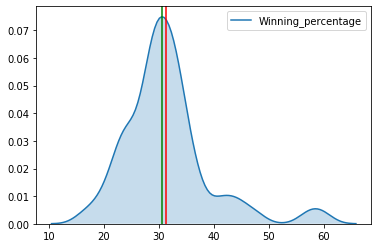

In [69]:
sns.kdeplot(df.Winning_percentage,shade=True)
plt.axvline(df.Winning_percentage.mean(),color="r")
plt.axvline(df.Winning_percentage.median(),color="g")

In [70]:
df.nlargest(5, 'Winning_percentage')

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Winning_percentage
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2003,1,47.475134
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931,1988,1,44.557057
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629


#  1.d.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [102]:
df["BestPosition"]=df["BestPosition"].astype(int)

In [106]:
winning_percentage_1_3=df.Winning_percentage[df.BestPosition.between(1,3)]

In [107]:
winning_percentage_4_7=df.Winning_percentage[df.BestPosition.between(4,7)]

In [109]:
#step1: 
##    H0:No difference between winning_percentage for teams with position 1-3 and 4-7.
##    H1: significant difference between winning_percentage for teams with position 1-3 and 4-7.

#step2: 
##    alpha= 5%

In [110]:
#step3:test of normality
print(st.shapiro(winning_percentage_1_3))
print(st.shapiro(winning_percentage_4_7))

(0.8252524733543396, 0.003532945876941085)
(0.9436671733856201, 0.2809881269931793)


In [111]:
st.levene(winning_percentage_1_3,winning_percentage_4_7)

LeveneResult(statistic=8.724629449043212, pvalue=0.0055024902317928875)

- In test of normality the p value is less than alpha , hence assumption is wrong , hence we need to go for two sample independent non parametric test.

In [112]:
st.mannwhitneyu(winning_percentage_1_3,winning_percentage_4_7)

MannwhitneyuResult(statistic=11.0, pvalue=4.1876636593687686e-07)

In [114]:
#step4: establish critical region/value
tcrit= st.t.isf(0.025,len(winning_percentage_1_3)+len(winning_percentage_4_7)-2)
tcrit

2.0280940009804507

In [115]:
#step5: compare and dicission
## As p avlue is less than alpha(0.05) as well as t stat greater than t critical, we fail to accept null hypothesis.

- INFERENCE
    - There is a  significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

# 2. A study was done to measure the blood pressure of 60 year old women with glaucoma

In [75]:
n=200
x_bar=140
sigma=25

# 2.a.	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [76]:
standard_error=sigma/np.sqrt(n)
standard_error

1.7677669529663687

OBSERVATION:
 - Standard_error = 1.76
 - The standard error is metric for representing population.
 - it is the function of confidence interval

# 2.b.	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [77]:
st.norm.interval(0.95,x_bar,standard_error)

(136.5352404391258, 143.4647595608742)

# 2.c.	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [78]:
n_new=100
standard_error_new=sigma/np.sqrt(n_new)
standard_error_new

2.5

In [79]:
st.norm.interval(0.95,x_bar,standard_error_new)

(135.10009003864985, 144.89990996135015)

# 2.d. Which of the two above intervals are wider?

- The sample size with 100 as wider confidence interval.
- Hence sample size n is inversely proportional to confidence interval range.


# 2.e. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

- As n decreases standard error increases hence range of confidence interval increases.
- Large sample size will lead to less variation i.e less standard error.


# 3.Par Inc., is a major manufacturer of golf equipment

In [80]:
#import dataset
df1=pd.read_csv("Golf.csv")
df1.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


# 3.a. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

- The data which we have is a two sample dependent sample.(type of mean)
- HYPOTHESIS IS:
        - H0: mu_current = mu_new i.e Driving distance is same for current and new ball(no differnece)
        - H1: mu_current != mu_new i.e Driving distance is different for current and new ball.

In [81]:
dif=df1.New-df1.Current

In [82]:
st.shapiro(dif)   # test of normality

(0.9835827350616455, 0.81858891248703)

In [83]:
st.levene(df1.New,df1.Current) # test of variance equality

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

-  As in both the cases p value is greater than alpha(5%) the sample is parametric and accepts null hypothesis.
- So we should go for paired t test.

# 3.b. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [84]:
st.ttest_rel(df1.Current,df1.New)

Ttest_relResult(statistic=1.2769699827911767, pvalue=0.20916361823147053)

In [86]:
tcrit=st.t.isf(0.025,len(df1.Current)-1)
tcrit

2.0226909117347285

- OBSERVATIONS:
    - As p value is greater than alpha(0.05) and t_stat is less than t_crit , null hypothesis is accepted.
    - Therefore, there is no effect of the new coating on driving distances.

# 3.c.What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

- Confidence interval of driving distance for current ball

In [94]:
x_bar_current=np.mean(df1.Current)
sigma_current=np.std(df1.Current)
standard_error_current=sigma_current/np.sqrt(len(df1.Current))

In [95]:
st.norm.interval(0.95,x_bar_current,standard_error_current)

(267.596592950119, 272.953407049881)

- Confidence interval of driving distance for new ball

In [96]:
x_bar_new=np.mean(df1.New)
sigma_new=np.std(df1.New)
standard_error_new=sigma_new/np.sqrt(len(df1.New))

In [97]:
st.norm.interval(0.95,x_bar_new,standard_error_new)

(264.4715543699107, 270.5284456300893)

- Confidence interval of difference of driving distance between current ball and new ball.

In [99]:
x_bar_dif=np.mean(dif)
sigma_dif=np.std(dif)
standard_error_dif=sigma_dif/np.sqrt(len(dif))

In [100]:
st.norm.interval(0.95,x_bar_dif,standard_error_dif)

(-6.980645840384023, 1.4306458403840234)